Importing the essential Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


Analysis

In [2]:
c_data = pd.read_csv('Mall_Customers.csv')

In [3]:
print(c_data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [4]:
c_data['Gender'] = c_data['Gender'].map({'Male': 0, 'Female': 1})
print(c_data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       0   19                  15                      39
1             2       0   21                  15                      81
2             3       1   20                  16                       6
3             4       1   23                  16                      77
4             5       1   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       1   35                 120                      79
196         197       1   45                 126                      28
197         198       0   32                 126                      74
198         199       0   32                 137                      18
199         200       0   30                 137                      83

[200 rows x 5 columns]


In [5]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [6]:
c_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Taking every age, earning and spending score into account

In [7]:
x = c_data.iloc[:, [2, 3, 4]].values

In [8]:
print(x)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

In [10]:
print(x)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

optimum number of clusters
WCSS

In [11]:
wcss = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)


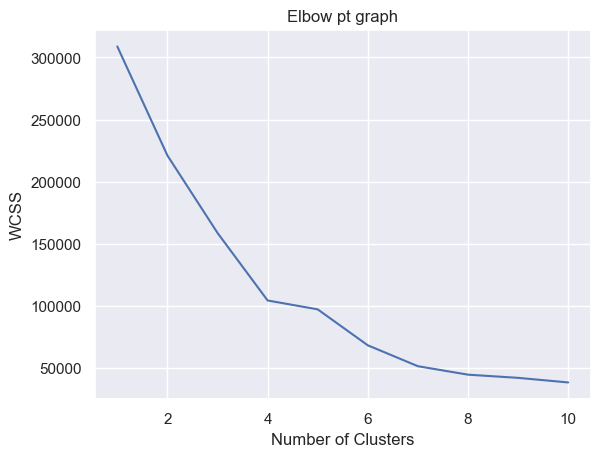

In [12]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow pt graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters = 4

Training the K-Means Clustering model 

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init='auto')

y = kmeans.fit_predict(x)
print(y)

[2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 0 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 0 2 2 2 0 0 0 0 2 0 1 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Visualizing all the clusters

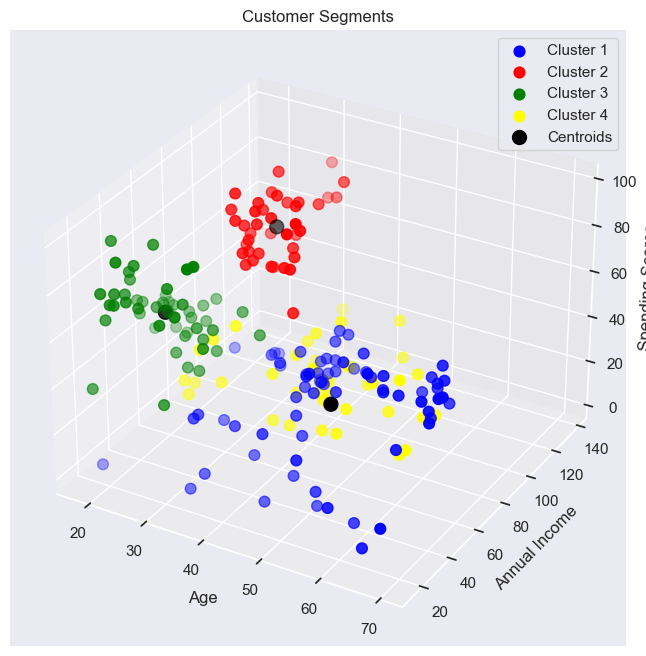

In [14]:


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Cluster 1
ax.scatter(x[y == 0, 0], x[y == 0, 1], x[y == 0, 2], c='blue', s=60, label='Cluster 1')
# Cluster 2
ax.scatter(x[y == 1, 0], x[y == 1, 1], x[y == 1, 2], c='red', s=60, label='Cluster 2')
# Cluster 3
ax.scatter(x[y == 2, 0], x[y == 2, 1], x[y == 2, 2], c='green', s=60, label='Cluster 3')
# Cluster 4
ax.scatter(x[y == 3, 0], x[y == 3, 1], x[y == 3, 2], c='yellow', s=60, label='Cluster 4')

# Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', s=100, label='Centroids')

plt.title('Customer Segments')
ax.set_xlabel('Age')  # Customize with actual feature name
ax.set_ylabel('Annual Income')  # Customize with actual feature name
ax.set_zlabel('Spending Scores')  # Customize with actual feature name
plt.legend()
plt.show()


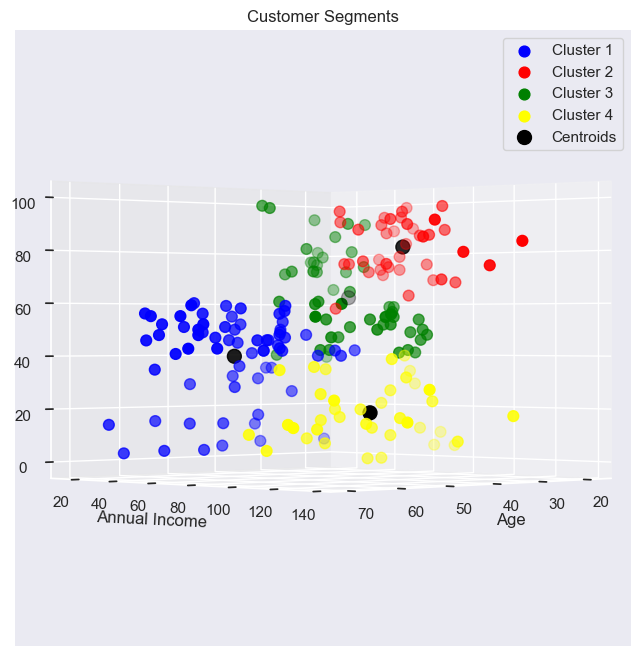

In [15]:

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Cluster 1
ax.scatter(x[y == 0, 0], x[y == 0, 1], x[y == 0, 2], c='blue', s=60, label='Cluster 1')
# Cluster 2
ax.scatter(x[y == 1, 0], x[y == 1, 1], x[y == 1, 2], c='red', s=60, label='Cluster 2')
# Cluster 3
ax.scatter(x[y == 2, 0], x[y == 2, 1], x[y == 2, 2], c='green', s=60, label='Cluster 3')
# Cluster 4
ax.scatter(x[y == 3, 0], x[y == 3, 1], x[y == 3, 2], c='yellow', s=60, label='Cluster 4')

# Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', s=100, label='Centroids')

plt.title('Customer Segments')
ax.set_xlabel('Age')  
ax.set_ylabel('Annual Income')  
ax.set_zlabel('Spending Scores')  
plt.legend()
elev_angle = 0  
azim_angle = 45  
ax.view_init(elev=elev_angle, azim=azim_angle)

plt.show()

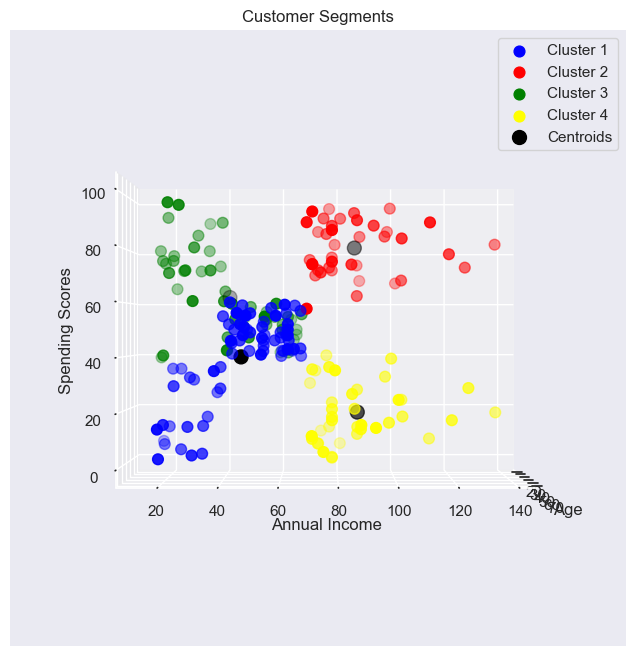

In [16]:

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Cluster 1
ax.scatter(x[y == 0, 0], x[y == 0, 1], x[y == 0, 2], c='blue', s=60, label='Cluster 1')
# Cluster 2
ax.scatter(x[y == 1, 0], x[y == 1, 1], x[y == 1, 2], c='red', s=60, label='Cluster 2')
# Cluster 3
ax.scatter(x[y == 2, 0], x[y == 2, 1], x[y == 2, 2], c='green', s=60, label='Cluster 3')
# Cluster 4
ax.scatter(x[y == 3, 0], x[y == 3, 1], x[y == 3, 2], c='yellow', s=60, label='Cluster 4')

# Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', s=100, label='Centroids')

plt.title('Customer Segments')
ax.set_xlabel('Age')  
ax.set_ylabel('Annual Income')  
ax.set_zlabel('Spending Scores')  
plt.legend()
elev_angle = 0  
azim_angle = 0  
ax.view_init(elev=elev_angle, azim=azim_angle)

plt.show()

In [17]:
centroids = kmeans.cluster_centers_

for i, centroid in enumerate(centroids):
    print(f"Location of centroid {i}: {centroid}")

Location of centroid 0: [52.05797101 46.42028986 39.88405797]
Location of centroid 1: [32.875 86.1   81.525]
Location of centroid 2: [25.05660377 40.73584906 62.62264151]
Location of centroid 3: [40.39473684 87.         18.63157895]


Centroid 0 corresponds to Cluster 1 : High Age, Mediocre Earning, Mediocre spending score

Centroid 1 corresponds to Cluster 2 : Mid Age, High Earning, High spending score

Centroid 2 corresponds to Cluster 3 : Young Age, Mediocre Earning, Above-Mediocre spending score

Centroid 3 corresponds to Cluster 4 : Mid Age, High Earning, Low spending score